In [85]:
import pandas as pd
import matplotlib.pyplot as plt
import folium
from folium.plugins import MarkerCluster
%matplotlib inline

australia=pd.read_csv("https://frenzy86.s3.eu-west-2.amazonaws.com/fav/australia_cleaned.csv")
australia.head()

,Unnamed: 0,latitude,longitude,brightness,scan,track,acq_date,acq_time,confidence,bright_t31,frp,type,time_D,time_N,sat_Aqua,sat_Terra
0,0,-11.8070,142.0583,313.0,1.0,1.0,2019-08-01,56,48,297.3,6.6,0,1,0,0,1
1,1,-11.7924,142.0850,319.3,1.0,1.0,2019-08-01,56,71,297.3,11.3,0,1,0,0,1
2,2,-12.8398,132.8744,311.6,3.1,1.7,2019-08-01,57,42,298.7,23.1,0,1,0,0,1
3,3,-14.4306,143.3035,310.1,1.1,1.1,2019-08-01,57,33,296.1,6.5,0,1,0,0,1
4,4,-12.4953,131.4897,310.3,4.0,1.9,2019-08-01,57,36,298.8,27.6,0,1,0,0,1


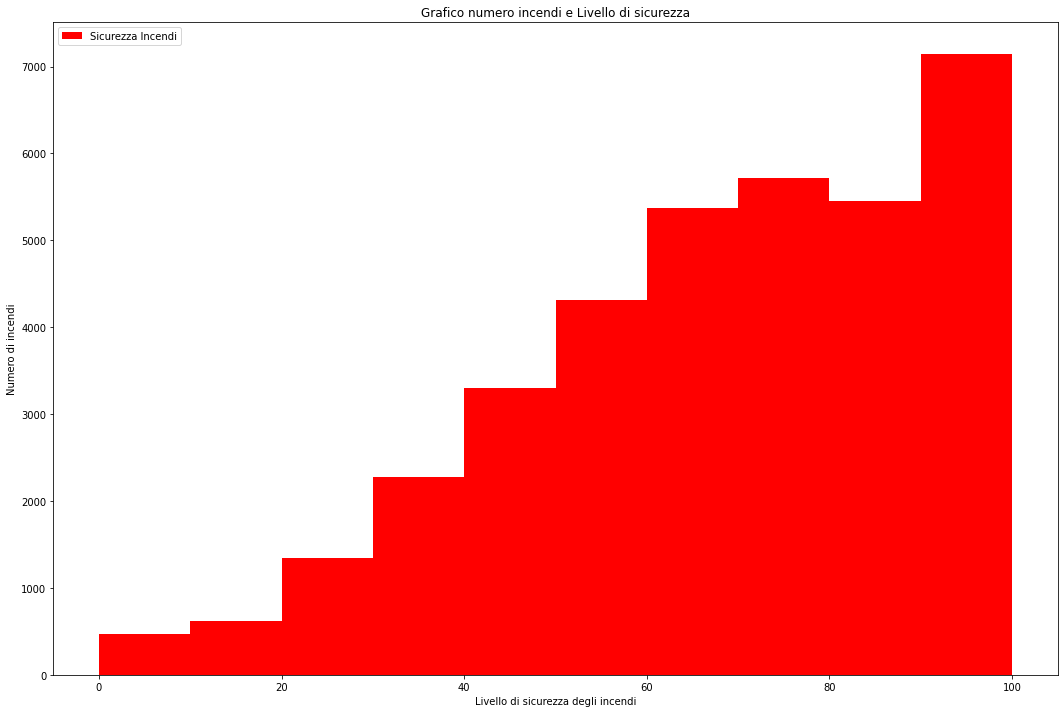

In [86]:
plt.figure(figsize=(18,12))

plt.hist(australia["confidence"],label="Sicurezza Incendi",color="red");
plt.xlabel("Livello di sicurezza degli incendi")
plt.ylabel("Numero di incendi")
plt.title("Grafico numero incendi e Livello di sicurezza")
plt.legend(loc=2);

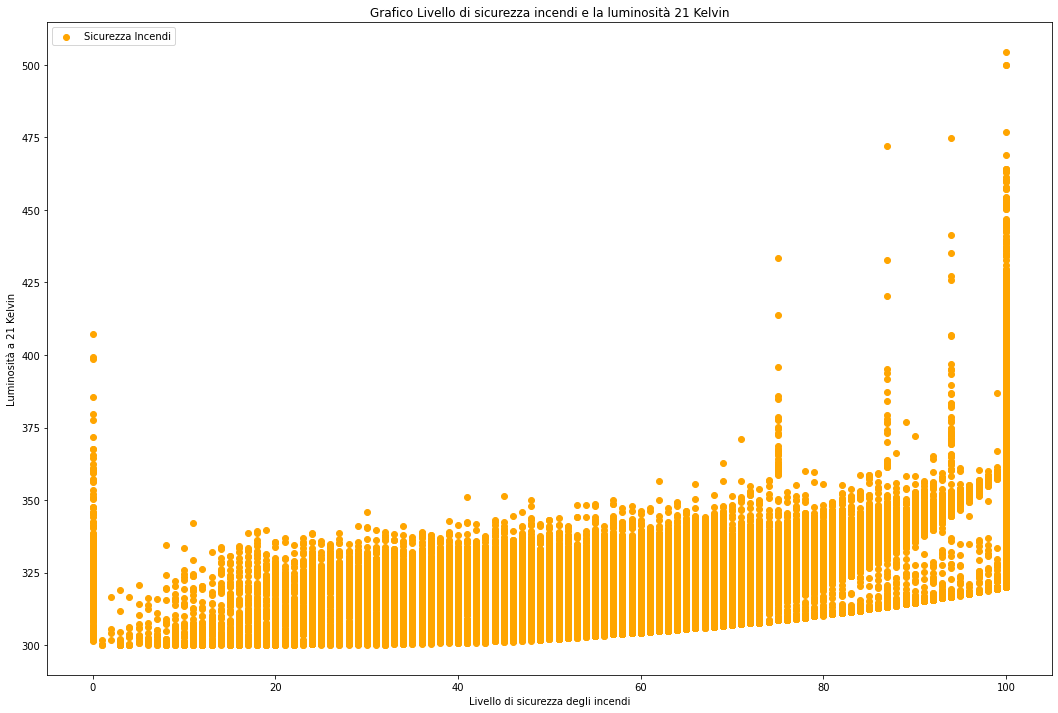

In [87]:
plt.figure(figsize=(18,12))
plt.scatter(australia["confidence"],australia ["brightness"], label ="Sicurezza Incendi", color="orange");

plt.ylabel("Luminosità a 21 Kelvin")
plt.xlabel('Livello di sicurezza degli incendi')
plt.title("Grafico Livello di sicurezza incendi e la luminosità 21 Kelvin")
plt.legend(loc=2);

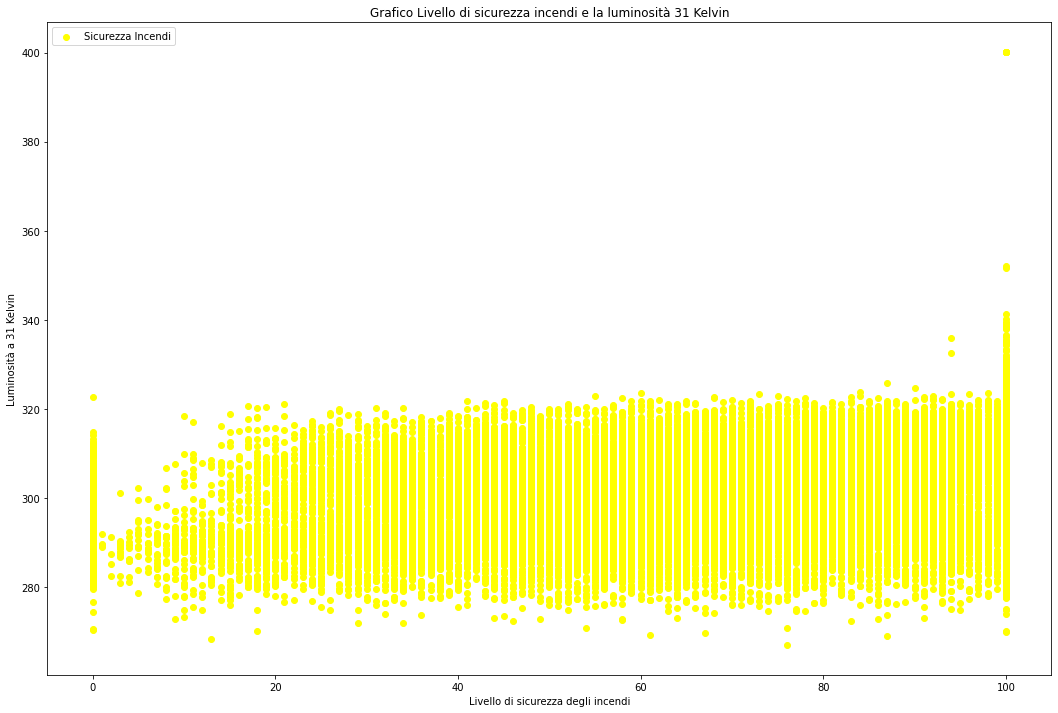

In [88]:
plt.figure(figsize=(18,12))
plt.scatter(australia["confidence"],australia ["bright_t31"], label ="Sicurezza Incendi", color="yellow");


plt.ylabel("Luminosità a 31 Kelvin")
plt.xlabel('Livello di sicurezza degli incendi')
plt.title("Grafico Livello di sicurezza incendi e la luminosità 31 Kelvin")
plt.legend(loc=2);

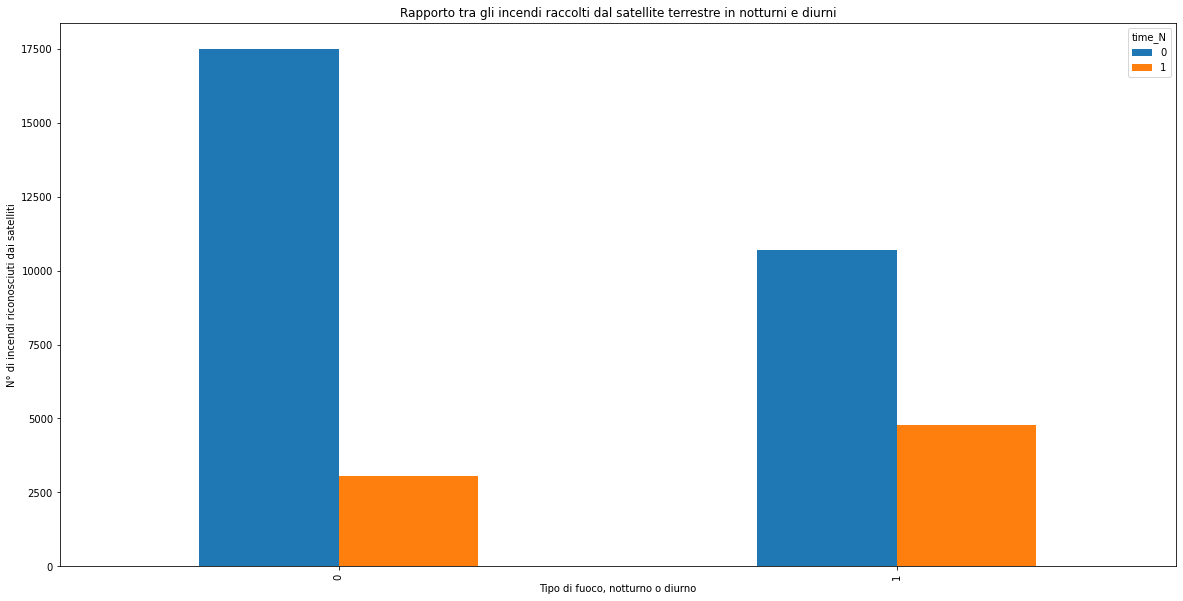

In [89]:
pd.crosstab(australia["sat_Terra"], australia["time_N"]).plot(kind="bar",figsize=(20,10));

plt.title("Rapporto tra gli incendi raccolti dal satellite terrestre in notturni e diurni")
plt.ylabel("N° di incendi riconosciuti dai satelliti")
plt.xlabel("Tipo di fuoco, notturno o diurno");

In [90]:
australia_1 =australia.copy()
australia_1.head()

,Unnamed: 0,latitude,longitude,brightness,scan,track,acq_date,acq_time,confidence,bright_t31,frp,type,time_D,time_N,sat_Aqua,sat_Terra
0,0,-11.8070,142.0583,313.0,1.0,1.0,2019-08-01,56,48,297.3,6.6,0,1,0,0,1
1,1,-11.7924,142.0850,319.3,1.0,1.0,2019-08-01,56,71,297.3,11.3,0,1,0,0,1
2,2,-12.8398,132.8744,311.6,3.1,1.7,2019-08-01,57,42,298.7,23.1,0,1,0,0,1
3,3,-14.4306,143.3035,310.1,1.1,1.1,2019-08-01,57,33,296.1,6.5,0,1,0,0,1
4,4,-12.4953,131.4897,310.3,4.0,1.9,2019-08-01,57,36,298.8,27.6,0,1,0,0,1


In [91]:
data=australia_1[(australia_1["confidence"]>= 70)]
data.head()

,Unnamed: 0,latitude,longitude,brightness,scan,track,acq_date,acq_time,confidence,bright_t31,frp,type,time_D,time_N,sat_Aqua,sat_Terra
1,1,-11.7924,142.0850,319.3,1.0,1.0,2019-08-01,56,71,297.3,11.3,0,1,0,0,1
7,7,-14.3195,143.5198,322.9,1.2,1.1,2019-08-01,57,79,290.9,20.4,0,1,0,0,1
8,8,-13.1654,141.9715,317.2,1.0,1.0,2019-08-01,57,72,300.0,9.9,0,1,0,0,1
12,12,-12.7626,142.1759,335.2,1.0,1.0,2019-08-01,57,88,301.7,30.1,0,1,0,0,1
21,21,-12.6491,134.3953,324.9,2.4,1.5,2019-08-01,57,79,300.6,57.7,0,1,0,0,1


In [92]:
data.shape

(18314, 16)

In [0]:
#Creare lista longitudine e latitudine
lat=data["latitude"].values.tolist()
long=data["longitude"].values.tolist()

In [0]:
#Mappa Australia
map1=folium.Map([-25.274398,133.775136],zoom_start=4)

In [0]:
#Creare un cluster di mappa
australia_cluster = MarkerCluster()

In [0]:
for latV,longV in zip(lat,long):
    folium.Marker(location=[latV,longV]).add_to(australia_cluster)

In [0]:
#Aggiungere il cluster alla mappa che vogliamo stampare
australia_cluster.add_to(map1);

In [98]:
map1

Output hidden; open in https://colab.research.google.com to view.

In [99]:
localizacion=australia_1[(australia_1["frp"]>= 2500)]
localizacion.head()

,Unnamed: 0,latitude,longitude,brightness,scan,track,acq_date,acq_time,confidence,bright_t31,frp,type,time_D,time_N,sat_Aqua,sat_Terra
26142,26142,-29.8187,152.1003,451.5,2.5,1.5,2019-09-12,418,100,312.3,2701.4,0,1,0,1,0
26149,26149,-29.8253,152.0949,469.1,2.5,1.5,2019-09-12,418,100,327.2,3679.5,0,1,0,1,0


In [0]:

map_2 = folium.Map([-25.274398,133.775136],zoom_start=4.5,tiles='Stamen Terrain')

In [0]:
lat_2 = localizacion["latitude"].values.tolist()
long_2 = localizacion["longitude"].values.tolist()

In [0]:
australia_cluster_2 = MarkerCluster().add_to(map_2)

In [0]:
for lat_2,long_2 in zip(lat_2,long_2):
    folium.Marker([lat_2,long_2]).add_to(australia_cluster_2)

In [104]:
map_2


Vuoi conoscere gli incendi divampati dopo il 15 settembre 2019?

In [105]:
mes = australia_1[(australia_1["acq_date"]>= "2019-09-15")]
mes.head()

,Unnamed: 0,latitude,longitude,brightness,scan,track,acq_date,acq_time,confidence,bright_t31,frp,type,time_D,time_N,sat_Aqua,sat_Terra
28581,28581,-11.0111,142.3085,312.7,2.5,1.5,2019-09-15,25,44,292.0,17.1,0,1,0,0,1
28582,28582,-10.9374,142.3810,315.0,2.5,1.5,2019-09-15,25,60,290.8,30.0,0,1,0,0,1
28583,28583,-10.9485,142.3960,312.2,2.5,1.5,2019-09-15,25,25,290.5,21.3,0,1,0,0,1
28584,28584,-12.5006,141.8479,320.2,2.5,1.5,2019-09-15,26,68,297.6,37.8,0,1,0,0,1
28585,28585,-14.5934,144.3026,323.1,1.5,1.2,2019-09-15,26,53,300.4,18.9,0,1,0,0,1


In [106]:
mes.describe()

,Unnamed: 0,latitude,longitude,brightness,scan,track,acq_time,confidence,bright_t31,frp,type,time_D,time_N,sat_Aqua,sat_Terra
count,7430.000000,7430.000000,7430.000000,7430.000000,7430.000000,7430.000000,7430.000000,7430.000000,7430.000000,7430.000000,7430.000000,7430.000000,7430.000000,7430.000000,7430.000000
mean,32295.500000,-19.436315,138.539510,332.228143,1.599489,1.211144,594.595155,69.188964,302.625882,58.501211,0.021400,0.783042,0.216958,0.593136,0.406864
std,2145.000583,7.721127,9.564807,21.020477,0.758726,0.236977,518.167491,23.844740,10.227897,103.350626,0.206763,0.412202,0.412202,0.491282,0.491282
min,28581.000000,-42.671300,115.441100,300.000000,1.000000,1.000000,0.000000,0.000000,267.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,30438.250000,-27.917825,132.068475,318.900000,1.100000,1.000000,310.000000,53.000000,294.700000,15.400000,0.000000,1.000000,0.000000,0.000000,0.000000
50%,32295.500000,-15.968900,136.523750,329.600000,1.300000,1.100000,429.000000,73.000000,302.800000,28.800000,0.000000,1.000000,0.000000,1.000000,0.000000
75%,34152.750000,-13.080825,146.428875,340.800000,1.900000,1.300000,601.000000,88.000000,310.200000,59.400000,0.000000,1.000000,0.000000,1.000000,1.000000
max,36010.000000,-10.863600,153.453800,504.400000,4.700000,2.000000,2359.000000,100.000000,400.100000,2056.700000,3.000000,1.000000,1.000000,1.000000,1.000000


In [0]:
map_sett = folium.Map([-25.274398,133.775136], zoom_start=4)

In [0]:
lat_3 = mes["latitude"].values.tolist()
long_3 = mes["longitude"].values.tolist()

In [0]:
australia_cluster_3 = MarkerCluster().add_to(map_sett)

In [0]:
for lat_3,long_3 in zip(lat_3,long_3):
    folium.Marker([lat_3,long_3]).add_to(australia_cluster_3)

In [111]:
map_sett

Output hidden; open in https://colab.research.google.com to view.

#Play with Folium

In [112]:
44.4807035,11.3712528

(44.4807035, 11.3712528)

In [0]:
import folium
m1 = folium.Map(location=[44.48, 11.37], tiles='openstreetmap', zoom_start=18)
m1.save('map1.html')

In [114]:
m1

In [0]:
m3.save("filename.png")